In [14]:
import pandas as pd
import numpy as np
import getpass
from pykrx import stock
import FinanceDataReader as fdr
from pandas.io.json import json_normalize
import json
from dateutil.relativedelta import relativedelta

import requests
from datetime import datetime, timedelta

start_date = '20201030'
end_date ='20211130'

In [20]:
etf_info = pd.read_excel('C:/Users/ysj/Desktop/etf_info.xlsx')
etf_info

,자산,기초시장,기초자산,기초자산상세,종목코드,ETF명,ETF약명,키워드
0,주식,국내,시장,인버스/레버리지,292340,DB 마이티 200커버드콜ATM레버리지증권상장지수투자신탁[주식-파생형],마이티 200커버드콜ATM레버리지,기타
1,주식,국내,시장,인버스/레버리지,252400,KB KBSTAR 200선물레버리지증권상장지수투자신탁(주식-파생형),KBSTAR 200선물레버리지,코스피200
2,주식,국내,시장,인버스/레버리지,252420,KB KBSTAR 200선물인버스2X증권상장지수투자신탁(주식-파생형),KBSTAR 200선물인버스2X,코스피200
3,주식,국내,시장,인버스/레버리지,252410,KB KBSTAR 200선물인버스증권상장지수투자신탁(주식-파생형),KBSTAR 200선물인버스,코스피200
4,주식,국내,시장,인버스/레버리지,307010,KB KBSTAR KRX300레버리지증권상장지수투자신탁(주식-파생형),KBSTAR KRX300레버리지,KRX300
...,...,...,...,...,...,...,...,...
392,주식,해외,테마/스타일,업종/테마,391600,한국투자 KINDEX 미국친환경그린테마INDXX증권상장지수투자신탁(주식),KINDEX 미국친환경그린테마INDXX,NaN
393,주식,해외,테마/스타일,업종/테마,371870,한국투자 KINDEX 차이나항셍테크증권상장지수투자신탁(주식),KINDEX 차이나항셍테크,NaN
394,주식,해외,테마/스타일,업종/테마,269530,한화 ARIRANG S&P글로벌인프라 증권상장지수투자신탁(주식),ARIRANG S&P글로벌인프라,NaN
395,주식,해외,테마/스타일,업종/테마,287180,한화 ARIRANG 미국나스닥테크증권상장지수투자신탁(주식),ARIRANG 미국나스닥테크,NaN


In [5]:
def get_etf_siga(stddate, etf_info):
    siga = pd.DataFrame()
    for i in range(0,len(etf_info.종목코드)) :
        etf_info.종목코드.iloc[i] = str(etf_info.종목코드[i]).zfill(6)
        siga_temp = stock.get_etf_ohlcv_by_date(stddate,stddate,etf_info.종목코드[i])
        siga_temp['종목코드'] = etf_info.종목코드[i]
        siga = pd.concat([siga, siga_temp])
    siga = pd.merge(etf_info, siga, how='inner', on='종목코드')
    return siga
siga = get_etf_siga(end_date, etf_info)


C:\Users\ysj\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
siga

,자산,기초시장,기초자산,기초자산상세,종목코드,ETF명,ETF약명,키워드,NAV,시가,고가,저가,종가,거래량,거래대금,기초지수,시가총액
0,주식,국내,시장,인버스/레버리지,292340,DB 마이티 200커버드콜ATM레버리지증권상장지수투자신탁[주식-파생형],마이티 200커버드콜ATM레버리지,기타,9554.63,9915,9915,9590,9590,6,58315,1295.86,5.754000e+09
1,주식,국내,시장,인버스/레버리지,252400,KB KBSTAR 200선물레버리지증권상장지수투자신탁(주식-파생형),KBSTAR 200선물레버리지,코스피200,19223.36,20515,20540,18900,19235,76924,1488892080,1873.74,2.308200e+10
2,주식,국내,시장,인버스/레버리지,252420,KB KBSTAR 200선물인버스2X증권상장지수투자신탁(주식-파생형),KBSTAR 200선물인버스2X,코스피200,2472.93,2325,2505,2315,2465,745203,1798196785,1873.74,3.722150e+10
3,주식,국내,시장,인버스/레버리지,252410,KB KBSTAR 200선물인버스증권상장지수투자신탁(주식-파생형),KBSTAR 200선물인버스,코스피200,5530.27,5395,5555,5350,5530,11426,62638875,1873.74,2.709700e+10
4,주식,국내,시장,인버스/레버리지,307010,KB KBSTAR KRX300레버리지증권상장지수투자신탁(주식-파생형),KBSTAR KRX300레버리지,KRX300,16647.35,17675,17790,16405,16755,6222,102919980,1716.48,1.172850e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,주식,해외,테마/스타일,업종/테마,391600,한국투자 KINDEX 미국친환경그린테마INDXX증권상장지수투자신탁(주식),KINDEX 미국친환경그린테마INDXX,NaN,11167.91,11280,11290,10980,11015,143628,1603051940,3949.33,7.049600e+10
393,주식,해외,테마/스타일,업종/테마,371870,한국투자 KINDEX 차이나항셍테크증권상장지수투자신탁(주식),KINDEX 차이나항셍테크,NaN,7937.68,8065,8205,7740,7780,18492,144662210,6028.63,4.668000e+09
394,주식,해외,테마/스타일,업종/테마,269530,한화 ARIRANG S&P글로벌인프라 증권상장지수투자신탁(주식),ARIRANG S&P글로벌인프라,NaN,11940.75,12005,12005,11910,11915,395,4719850,2595.28,5.957500e+09
395,주식,해외,테마/스타일,업종/테마,287180,한화 ARIRANG 미국나스닥테크증권상장지수투자신탁(주식),ARIRANG 미국나스닥테크,NaN,26865.16,26850,27020,26670,26775,15897,427642300,9446.78,3.346875e+10


In [7]:
def get_etf_rtn(etf_info, stddate) :
    date = [stddate
        , stock.get_nearest_business_day_in_a_week(datetime.strftime(datetime.strptime(stddate, "%Y%m%d") - timedelta(days=8),"%Y%m%d"))
        , stock.get_nearest_business_day_in_a_week(datetime.strftime(datetime.strptime(stddate, "%Y%m%d") - relativedelta(months=1),"%Y%m%d"))
        , stock.get_nearest_business_day_in_a_week(datetime.strftime(datetime.strptime(stddate, "%Y%m%d") - relativedelta(months=3),"%Y%m%d"))
        , stock.get_nearest_business_day_in_a_week(datetime.strftime(datetime.strptime(stddate, "%Y%m%d") - relativedelta(years=1),"%Y%m%d"))]
    etf_rtn = pd.DataFrame()
    for n in range(0, len(etf_info.종목코드)):
#         etf_info.종목코드.iloc[n] = str(etf_info.종목코드[n]).zfill(6)
        df = pd.DataFrame()
        for i in range(0,len(date)) :
            df_temp = stock.get_etf_ohlcv_by_date(date[i],date[i],etf_info.종목코드.iloc[n])
            df = pd.concat([df,df_temp])
        df['종목코드'] = etf_info.종목코드.iloc[n]
        df['1W'] = df.종가 / df.shift(-1).종가 - 1
        df['1M'] = df.종가 / df.shift(-2).종가 - 1
        df['3M'] = df.종가 / df.shift(-3).종가 - 1
        df['1Y'] = df.종가 / df.shift(-4).종가 - 1
        etf_rtn = pd.concat([etf_rtn,df[['종목코드', '종가','NAV','1W','1M','3M','1Y']].iloc[0:1]]).fillna(0)
    etf_rtn = pd.merge(etf_rtn, etf_info[['종목코드','ETF약명','기초시장','기초자산','기초자산상세']], how = 'inner', on ='종목코드').sort_values(by= '1W', ascending = False)
    etf_rtn = etf_rtn[['기초시장','기초자산','기초자산상세','종목코드','ETF약명','종가','NAV','1W','1M','3M','1Y']]
    return etf_rtn
rtn = get_etf_rtn(etf_info, end_date)

In [10]:
rtn

,기초시장,기초자산,기초자산상세,종목코드,ETF약명,종가,NAV,1W,1M,3M,1Y
12,국내,시장,인버스/레버리지,252710,TIGER 200선물인버스2X,2575,2573.65,0.144444,0.077406,0.192130,-0.244868
2,국내,시장,인버스/레버리지,252420,KBSTAR 200선물인버스2X,2465,2472.93,0.141204,0.069414,0.182254,-0.253030
18,국내,시장,인버스/레버리지,252670,KODEX 200선물인버스2X,2465,2471.56,0.141204,0.071739,0.185096,-0.250760
32,국내,시장,인버스/레버리지,253160,ARIRANG 200선물인버스2X,4955,4959.52,0.140391,0.072511,0.186826,-0.246960
25,국내,시장,인버스/레버리지,253230,KOSEF 200선물인버스2X,2450,2457.65,0.139535,0.074561,0.186441,-0.250765
...,...,...,...,...,...,...,...,...,...,...,...
1,국내,시장,인버스/레버리지,252400,KBSTAR 200선물레버리지,19235,19223.36,-0.127467,-0.078342,-0.180792,0.155950
7,국내,시장,인버스/레버리지,304780,HANARO 200선물레버리지,23065,23066.01,-0.127977,-0.079242,-0.180494,0.159920
31,국내,시장,인버스/레버리지,253150,ARIRANG 200선물레버리지,38240,38224.35,-0.128731,-0.078443,-0.180191,0.159315
10,국내,시장,인버스/레버리지,243880,TIGER 200IT레버리지,53915,53649.82,-0.132851,0.022473,-0.082454,0.379782


In [27]:
import matplotlib.pyplot as plt
def make_colors(n, colormap=plt.cm.Spectral):
    return colormap(np.linspace(0.1, 1.0, n))
def make_explode(n):
    explodes = np.zeros(n)
    explodes[0] = 0.15
    return explodes

,자산,기초시장,기초자산,기초자산상세,종목코드,ETF명,ETF약명,키워드
0,주식,국내,시장,인버스/레버리지,292340,DB 마이티 200커버드콜ATM레버리지증권상장지수투자신탁[주식-파생형],마이티 200커버드콜ATM레버리지,기타
1,주식,국내,시장,인버스/레버리지,252400,KB KBSTAR 200선물레버리지증권상장지수투자신탁(주식-파생형),KBSTAR 200선물레버리지,코스피200
2,주식,국내,시장,인버스/레버리지,252420,KB KBSTAR 200선물인버스2X증권상장지수투자신탁(주식-파생형),KBSTAR 200선물인버스2X,코스피200
3,주식,국내,시장,인버스/레버리지,252410,KB KBSTAR 200선물인버스증권상장지수투자신탁(주식-파생형),KBSTAR 200선물인버스,코스피200
4,주식,국내,시장,인버스/레버리지,307010,KB KBSTAR KRX300레버리지증권상장지수투자신탁(주식-파생형),KBSTAR KRX300레버리지,KRX300
...,...,...,...,...,...,...,...,...
289,주식,국내,테마/스타일,업종/테마,401170,KB KBSTAR iSelect메타버스증권상장지수투자신탁(주식),KBSTAR iSelect메타버스,메타버스
290,주식,국내,테마/스타일,업종/테마,388420,KB KBSTAR 비메모리반도체액티브증권상장지수투자신탁(주식),KBSTAR 비메모리반도체액티브,반도체
291,주식,국내,테마/스타일,업종/테마,407170,메리츠 MASTER 스마트커머스액티브증권상장지수투자신탁(주식),MASTER 스마트커머스액티브,커머스
292,주식,국내,테마/스타일,업종/테마,387280,미래에셋 TIGER 퓨처모빌리티액티브증권상장지수투자신탁(주식),TIGER 퓨처모빌리티액티브,미래차


In [22]:

dm_mkt = siga[(siga['기초시장'] == '국내')]
fr_mkt = siga[(siga['기초시장'] == '해외')] 
                  
                  
dm_mkt_ir = siga[(siga['기초시장'] == '국내') & (siga['기초자산상세'] == '인버스/레버리지')]
dm_mkt_gr = siga[(siga['기초시장'] == '국내') & (siga['기초자산상세'] == '일반')]
dm_mkt_gs = siga[(siga['기초시장'] == '국내') & (siga['기초자산상세'] == '일반상세')]
dm_thst_st = siga[(siga['기초시장'] == '국내') & (siga['기초자산상세'] == '전략')]
dm_thst_tm = siga[(siga['기초시장'] == '국내') & (siga['기초자산상세'] == '업종/테마')]
fr_mkt_ir = siga[(siga['기초시장'] == '해외') & (siga['기초자산상세'] == '인버스/레버리지')]
fr_mkt_gr = siga[(siga['기초시장'] == '해외') & (siga['기초자산상세'] == '일반')]
fr_mkt_gs = siga[(siga['기초시장'] == '해외') & (siga['기초자산상세'] == '일반상세')]
fr_thst_st = siga[(siga['기초시장'] == '해외') & (siga['기초자산상세'] == '전략')]
fr_thst_st = siga[(siga['기초시장'] == '해외') & (siga['기초자산상세'] == '업종/테마')]
dm_thst_tm

,자산,기초시장,기초자산,기초자산상세,종목코드,ETF명,ETF약명,키워드,NAV,시가,고가,저가,종가,거래량,거래대금,기초지수,시가총액
184,주식,국내,테마/스타일,업종/테마,363580,삼성 KODEX 200IT Total Return증권상장지수투자신탁[주식],KODEX 200IT TR,IT,13138.25,13585,13630,13015,13165,2782,36969520,3955.08,8.293950e+10
185,주식,국내,테마/스타일,업종/테마,402520,브이아이 FOCUS 혁신기업액티브증권상장지수투자신탁[주식],FOCUS 혁신기업액티브,혁신기술,9361.56,9645,9670,9375,9375,25,238730,2839.01,1.312500e+10
186,주식,국내,테마/스타일,업종/테마,285000,KB KBSTAR 200IT증권상장지수투자신탁(주식),KBSTAR 200IT,IT,15527.95,16100,16100,15455,15545,153,2413195,3542.99,9.948800e+09
187,주식,국내,테마/스타일,업종/테마,287300,KB KBSTAR 200건설증권상장지수투자신탁(주식),KBSTAR 200건설,건설,11660.69,12075,12140,11595,11660,1306,15514520,283.45,3.964400e+09
188,주식,국내,테마/스타일,업종/테마,287310,KB KBSTAR 200경기소비재증권상장지수투자신탁(주식),KBSTAR 200경기소비재,경기소비재,9876.57,10225,10225,9890,9895,68,679005,1590.05,1.385300e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,주식,국내,테마/스타일,업종/테마,401170,KB KBSTAR iSelect메타버스증권상장지수투자신탁(주식),KBSTAR iSelect메타버스,메타버스,12339.74,12540,12750,12245,12345,654374,8220795185,2554.15,2.249259e+11
290,주식,국내,테마/스타일,업종/테마,388420,KB KBSTAR 비메모리반도체액티브증권상장지수투자신탁(주식),KBSTAR 비메모리반도체액티브,반도체,9840.69,10335,10365,9760,9830,136977,1378408445,2668.67,1.985660e+10
291,주식,국내,테마/스타일,업종/테마,407170,메리츠 MASTER 스마트커머스액티브증권상장지수투자신탁(주식),MASTER 스마트커머스액티브,커머스,9311.72,9655,9655,9260,9300,28819,271379810,1072.40,7.440000e+09
292,주식,국내,테마/스타일,업종/테마,387280,미래에셋 TIGER 퓨처모빌리티액티브증권상장지수투자신탁(주식),TIGER 퓨처모빌리티액티브,미래차,11607.41,12000,12090,11540,11610,34193,403510300,2336.93,7.024050e+10


In [24]:
dm_mkt.groupby('기초자산상세').describe()['시가총액'].sort_values('mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
기초자산상세,,,,,,,,
일반,60.0,3.092826e+11,7.469188e+11,2.885000e+09,1.062675e+10,2.556788e+10,2.698841e+11,4.985676e+12
인버스/레버리지,34.0,2.225329e+11,5.393167e+11,4.120750e+09,8.137700e+09,2.497340e+10,8.389312e+10,2.453908e+12
일반상세,36.0,1.311815e+11,3.359178e+11,3.446000e+09,7.682375e+09,1.505040e+10,3.818670e+10,1.502935e+12
업종/테마,110.0,8.893375e+10,1.927907e+11,1.192800e+09,8.602125e+09,2.166412e+10,6.244000e+10,1.124050e+12
전략,54.0,2.318136e+10,3.932319e+10,2.636000e+09,6.522188e+09,8.238500e+09,1.676672e+10,1.985692e+11


In [25]:
fr_mkt.groupby('기초자산상세').describe()['시가총액'].sort_values('mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
기초자산상세,,,,,,,,
업종/테마,35.0,2.240676e+11,5.489297e+11,4.668000e+09,1.402513e+10,4.202000e+10,1.168814e+11,3.035510e+12
일반,45.0,1.476639e+11,2.950991e+11,4.358250e+09,1.114050e+10,4.727700e+10,1.675620e+11,1.682384e+12
일반상세,2.0,4.204425e+10,5.152369e+10,5.611500e+09,2.382788e+10,4.204425e+10,6.026062e+10,7.847700e+10
전략,7.0,3.160424e+10,3.738988e+10,7.260000e+09,1.130800e+10,1.485600e+10,3.170485e+10,1.130880e+11
인버스/레버리지,14.0,2.881639e+10,3.437632e+10,5.267250e+09,8.996375e+09,1.382550e+10,2.885088e+10,1.160875e+11


In [26]:
dm_thst_tm.groupby('키워드').describe()['시가총액'].sort_values('mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
키워드,,,,,,,,
2차전지,3.0,9.197685e+11,3.413204e+11,5.257350e+11,8.176275e+11,1.109520e+12,1.116785e+12,1.124050e+12
친환경,1.0,3.097010e+11,NaN,3.097010e+11,3.097010e+11,3.097010e+11,3.097010e+11,3.097010e+11
메타버스,4.0,2.556775e+11,1.820052e+11,1.129550e+10,1.715183e+11,2.987154e+11,3.828746e+11,4.139835e+11
미래차,5.0,1.658667e+11,2.579449e+11,3.289300e+10,3.499900e+10,6.490400e+10,7.024050e+10,6.262970e+11
은행,2.0,1.614496e+11,2.086497e+11,1.391200e+10,8.768081e+10,1.614496e+11,2.352184e+11,3.089872e+11
IT,10.0,1.398173e+11,2.662311e+11,5.990400e+09,1.249785e+10,5.371800e+10,8.781960e+10,8.796795e+11
여행레저,1.0,1.214862e+11,NaN,1.214862e+11,1.214862e+11,1.214862e+11,1.214862e+11,1.214862e+11
미디어,1.0,1.144845e+11,NaN,1.144845e+11,1.144845e+11,1.144845e+11,1.144845e+11,1.144845e+11
반도체,6.0,7.809516e+10,8.812682e+10,8.662500e+09,2.158420e+10,3.680312e+10,1.119890e+11,2.327400e+11


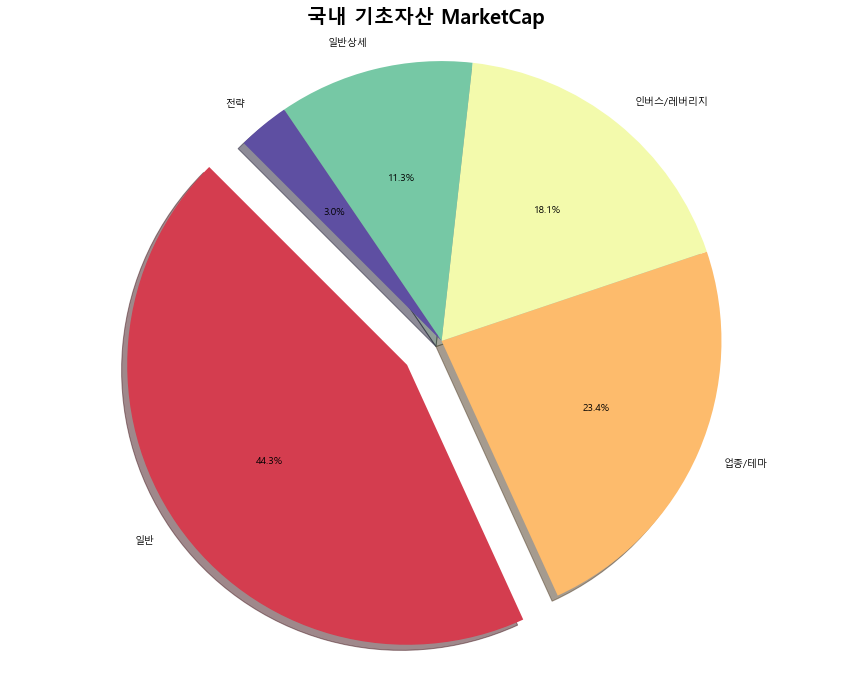

In [40]:
sector_marcap = dm_mkt.groupby('기초자산상세')['시가총액'].sum().sort_values(ascending=False)
values = sector_marcap.values
labels = sector_marcap.index
n = len(labels)

plt.figure(figsize=(15,12))
plt.title('국내 기초자산 MarketCap', fontsize = 20, fontweight = 'bold')
plt.pie(values, labels=labels, colors=make_colors(n), explode=make_explode(n), autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis('equal')
plt.show()

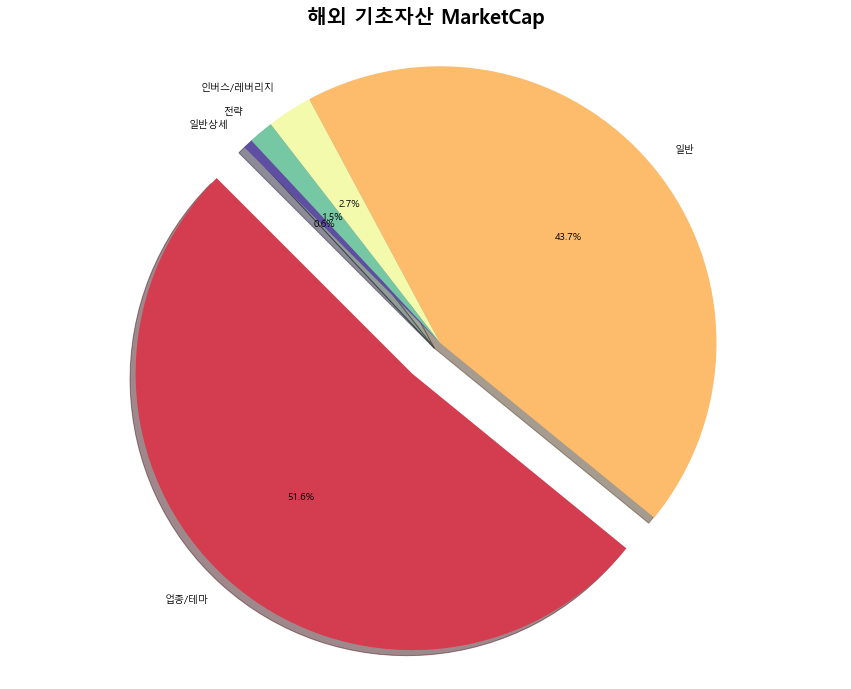

In [41]:
sector_marcap = fr_mkt.groupby('기초자산상세')['시가총액'].sum().sort_values(ascending=False)
values = sector_marcap.values
labels = sector_marcap.index
n = len(labels)

plt.figure(figsize=(15,12))
plt.title('해외 기초자산 MarketCap', fontsize = 20, fontweight = 'bold')
plt.pie(values, labels=labels, colors=make_colors(n), explode=make_explode(n), autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis('equal')
plt.show()

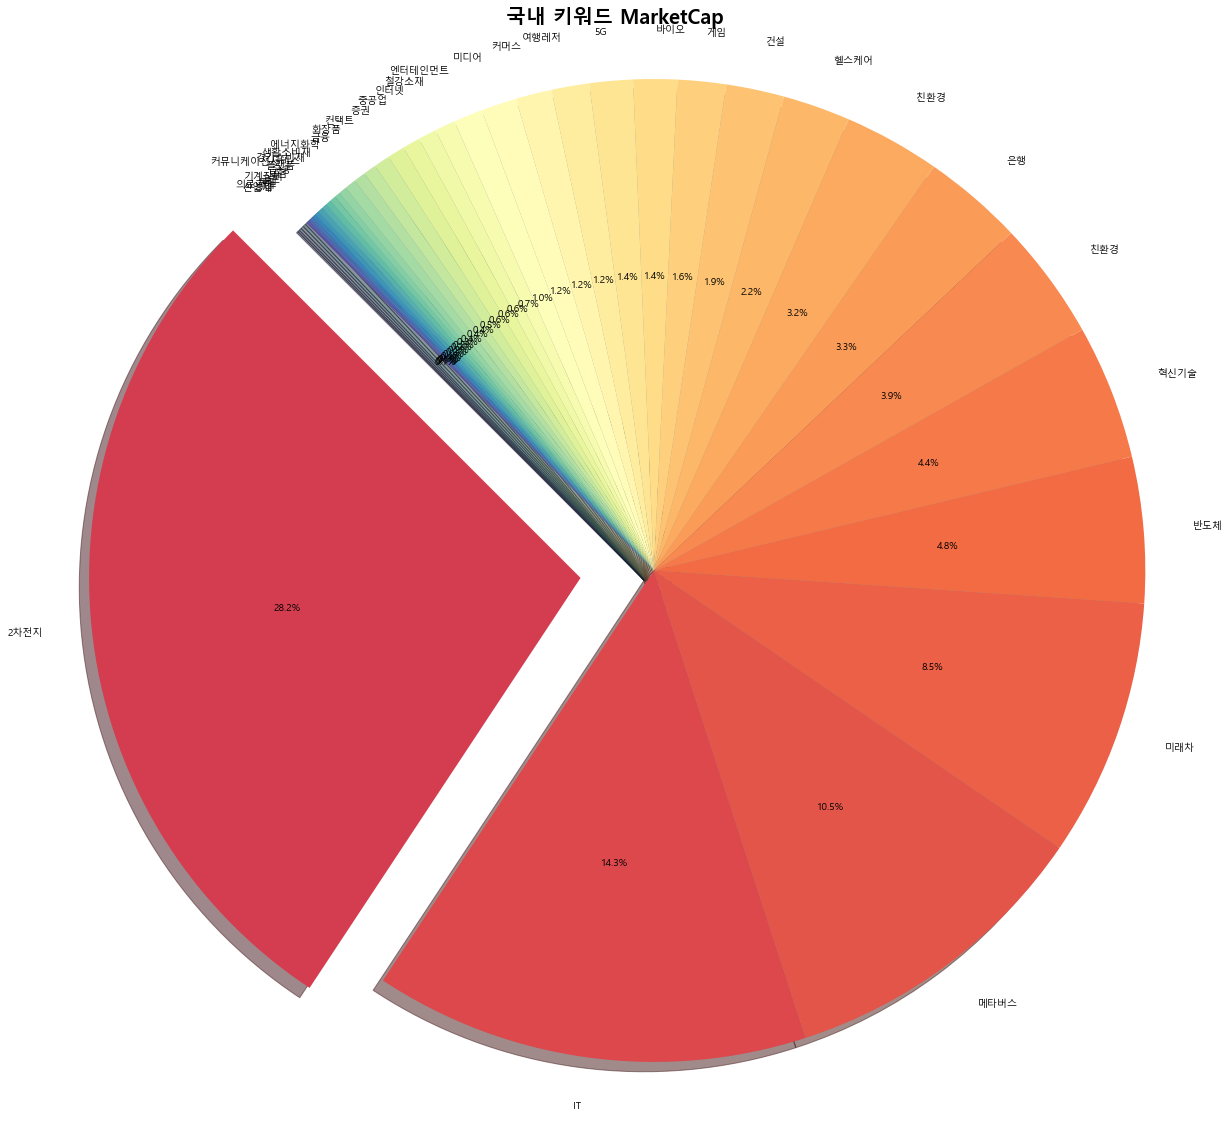

In [42]:
sector_marcap = dm_thst_tm.groupby('키워드')['시가총액'].sum().sort_values(ascending=False)
values = sector_marcap.values
labels = sector_marcap.index
n = len(labels)

plt.figure(figsize=(20,20))
plt.title('국내 키워드 MarketCap', fontsize = 20, fontweight = 'bold')
plt.pie(values, labels=labels, colors=make_colors(n), explode=make_explode(n), autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis('equal')
plt.show()